# 게임 설계 전략 제안

게임 시장의 동향과 그에 따른 방향성 제안


데이터를 불러옵니다.

In [1]:
import pandas as pd
import numpy as np

data = '/content/drive/MyDrive/vgames2.csv'
df = pd.read_csv(data)

결측치를 제거합니다.<br>
연도가 미정확하게 기입되어있는 자료 역시 삭제합니다. <br>
연도별 10년 단위로 카테고리화합니다.


In [ ]:
df = df.dropna()

#연도 미정확하게 기입되어있는 자료 삭제
df = df.loc[(df['Year'].values - 1000) > 0]

In [ ]:
# 연도별 카테고리화시킨 칼럼 추가
def decade(x):
  if x < 1990:
    value = '1980-1989'
  elif x < 2000:
    value = '1990-1999'
  elif x < 2010:
    value = '2000-2009'
  else:
    value = '2010-'
  return value

df['Y_category'] = df['Year'].apply(decade)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Y_category
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0,2000-2009
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01,2000-2009
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0,2010-
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0,2010-
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04,2010-
...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01,2000-2009
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0,2000-2009
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,2010-
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,2010-


판매량 비교를 위해서 단위를 통일합니다.
단위는 Million 단위로 통일합니다.

In [ ]:
#수치자료 Million으로 통일 
df['NA_Sales'] = df["NA_Sales"].replace({"K":"*1e-3", "M":""}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df["EU_Sales"].replace({"K":"*1e-3", "M":""}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df["JP_Sales"].replace({"K":"*1e-3", "M":""}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df["Other_Sales"].replace({"K":"*1e-3", "M":""}, regex=True).map(pd.eval).astype(float)
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Y_category,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,2000-2009,0.04
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2000-2009,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010-,0.02
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010-,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010-,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,2000-2009,0.20
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,2000-2009,0.01
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,2010-,0.79
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,2010-,0.38


지역 별 선호하는 게임을 선형 그래프로 확인합니다.<br>

Text(0, 0.5, 'Sales(Million)')

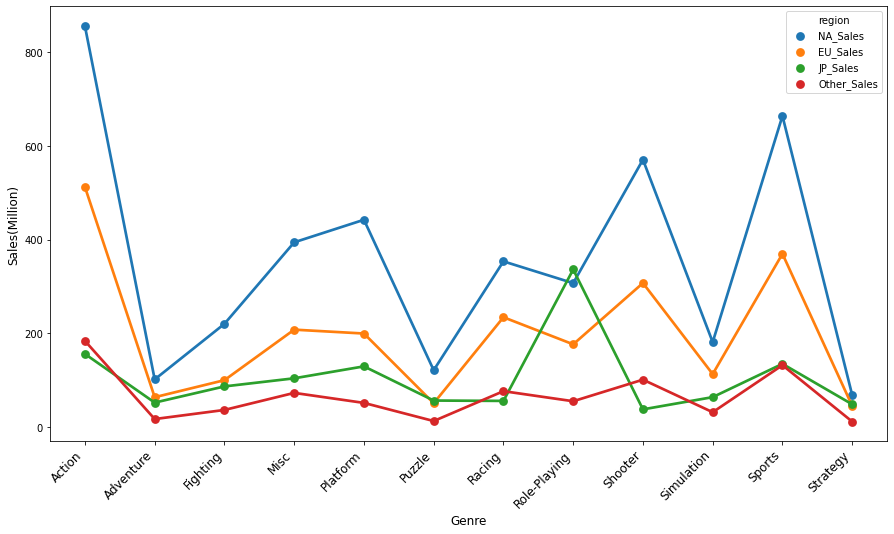

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#1. 지역별 선호 게임장르 
df_geo = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Genre').sum().reset_index()
df_geo_melt = pd.melt(df_geo, id_vars = 'Genre', var_name = 'region', value_name = 'value' )

plt.figure(figsize=(15,8))
sns.pointplot(x="Genre", y= "value",hue='region',marker="o",data=df_geo_melt)
plt.xticks(size=5,rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel('Genre',size=12)
plt.ylabel('Sales(Million)',size=12)




연도별 장르 트렌드를 알아봅니다.

Text(0, 0.5, 'count')

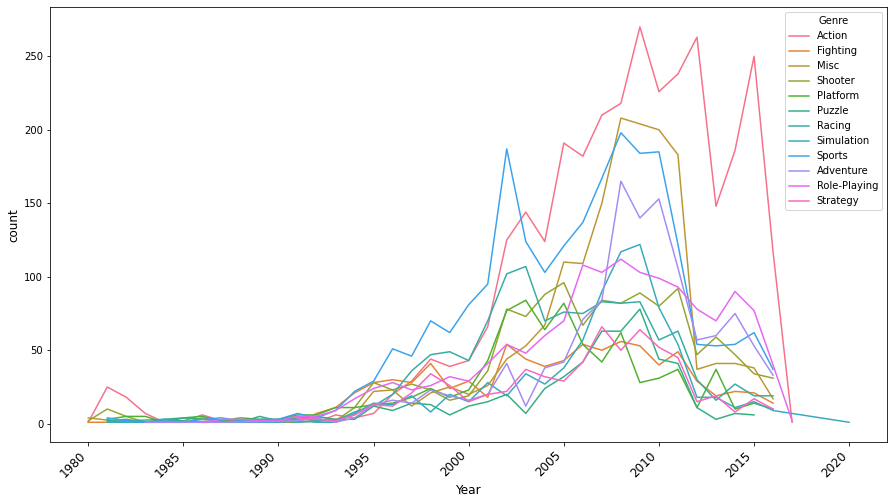

In [ ]:
#2. 연도별 장르 트랜드 (연도별 장르 그룹화)

#2-1. 연도별 장르 출시 개수size()한 것 
df_Y_G = df[['Year','Genre']].sort_values('Year').groupby(['Year','Genre']).size().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y= 0,hue='Genre',data=df_Y_G)
plt.xticks(size=5,rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel('Year',size=12)
plt.ylabel('count',size=12)



Text(0, 0.5, 'Sales')

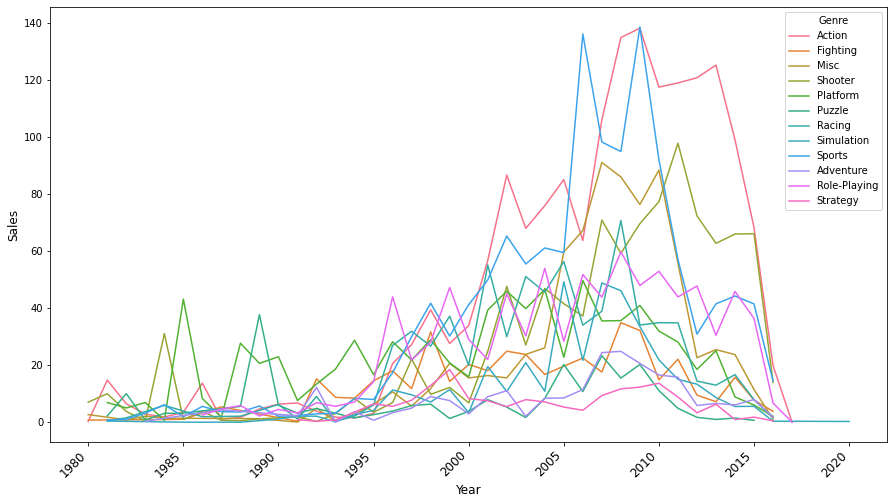

In [ ]:
#2-2. 연도별 장르 Sales Sum()한 것 

df_Y_G_S = df[['Year','Genre','Total_Sales']].groupby(['Year','Genre']).sum()
df_Y_G_S = df_Y_G_S.reset_index()
#df_Y_G_S.head(20)

plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y= 'Total_Sales',hue='Genre', data=df_Y_G_S)
plt.xticks(size=5,rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel('Year',size=12)
plt.ylabel('Sales',size=12)

In [ ]:
#2-2 설명 자료 

#2004, 2009년에 스포츠 게임이 피크점을 찍은 이유 (2004 - 닌텐도 wii sport 출시 / 2009 - 닌텐도 wii sport resort 출시)
df_2006_sports = df.loc[(df['Year']== 2006)&(df['Genre']=='Sports')].sort_values('Total_Sales',ascending = False)
#df_2004_sports.head(30)
#df_2004_sports['Total_Sales'].sum()
df_2009_sports = df.loc[(df['Year']== 2009)&(df['Genre']=='Sports')].sort_values('Total_Sales',ascending = False)
#df_2009_sports.head(30)
#df_2009_sports['Total_Sales'].sum()
df_2006_sports

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Y_category,Total_Sales
2908,2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,2000-2009,82.74
14918,14919,Madden NFL 07,PS2,2006.0,Sports,Electronic Arts,3.63,0.24,0.01,0.61,2000-2009,4.49
13026,13027,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,2000-2009,4.40
15591,15592,FIFA Soccer 07,PS2,2006.0,Sports,Electronic Arts,0.71,2.48,0.03,0.89,2000-2009,4.11
2949,2950,Madden NFL 07,X360,2006.0,Sports,Electronic Arts,1.66,0.00,0.01,0.13,2000-2009,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...
7973,7974,NHL 2K7,XB,2006.0,Sports,Take-Two Interactive,0.01,0.00,0.00,0.00,2000-2009,0.01
5287,5288,The Hustle: Detroit Streets,XB,2006.0,Sports,Activision,0.01,0.00,0.00,0.00,2000-2009,0.01
7390,7391,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,2000-2009,0.01
183,184,Rugby 06,XB,2006.0,Sports,Electronic Arts,0.01,0.00,0.00,0.00,2000-2009,0.01


In [ ]:
#3. (필수)출고량이 높은 게임에 대한 분석 및 시각화 프로세스
#df.sort_values('Total_Sales',ascending=False).head(30)  #total sales 기준 top 30 게임 정렬


#각 장르별 상위 30위 게임 출고량
#df[['Name','Genre','Total_Sales']].sort_values('Total_Sales',ascending = False).groupby('Genre').head()
def top30_sales(x):
  df0 = df.loc[:,['Name','Genre','Total_Sales']]
  value = df0[df0['Genre']==x].sort_values('Total_Sales', ascending=False).head(30)
  return value['Total_Sales'].sum()


Genre = ['Action', 'Misc', 'Platform', 'Sports',
       'Racing', 'Role-Playing', 'Shooter']

list =[]
for genre in Genre:
  list.append(top30_sales(genre))

list
#top30_sales('Sports')


[267.34,
 220.73000000000002,
 333.13,
 296.1,
 244.27000000000007,
 268.03,
 311.46000000000004]

In [ ]:
#Top_30_Sales 데이터프레임 만들기
Top_30_Sales = pd.DataFrame({
    'Genre' :  ['Action', 'Misc', 'Platform', 'Sports',
       'Racing', 'Role-Playing', 'Shooter'],
    'Top_30_sum' :  [267.34,
 220.73000000000002,
 333.13,
 296.1,
 244.27000000000007,
 268.03,
 311.46000000000004]

})
Top_30_Sales = Top_30_Sales.sort_values('Top_30_sum',ascending = False).reset_index()

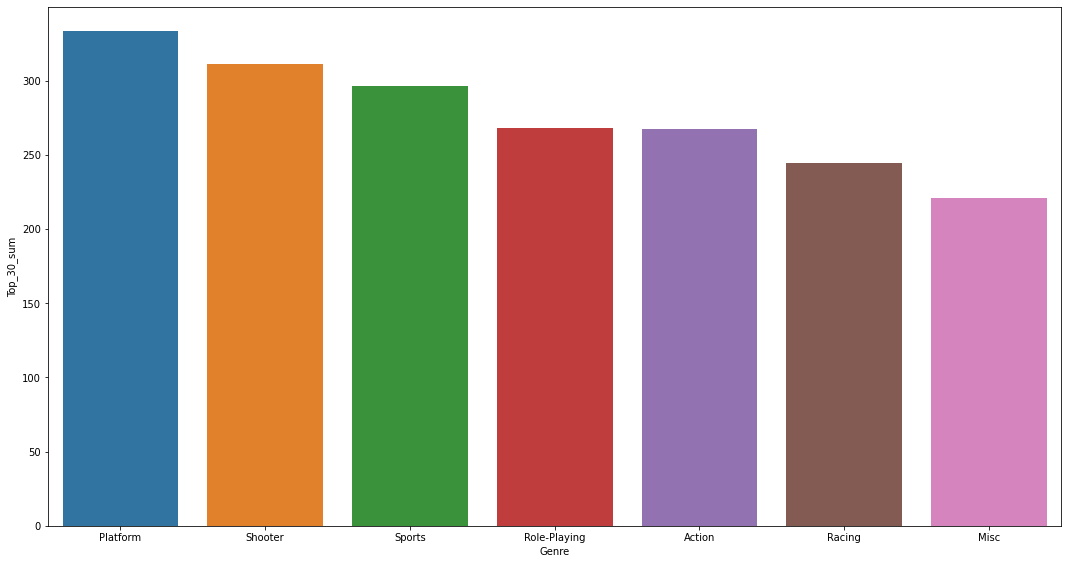

In [ ]:
#3- 시각화
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1)
ax = sns.barplot(x = 'Genre', y = 'Top_30_sum', data = Top_30_Sales )
sns.set(font_scale= 1)
plt.tight_layout()

In [ ]:
#2010년도 이후 출시 게임중 중 출고량이 높은 게임에 대한 분석
df.loc[df['Year'] > 2009].sort_values('Total_Sales',ascending=False).head(30)

def top30_sales_2010(x):
  df0 = df.loc[df['Year'] > 2009,['Name','Genre','Total_Sales']]
  value = df0[df0['Genre']==x].sort_values('Total_Sales', ascending=False).head(30)
  return value['Total_Sales'].sum()


Genre = ['Action', 'Misc', 'Platform', 'Sports',
       'Racing', 'Role-Playing', 'Shooter']

list2010 =[]
for genre in Genre:
  list2010.append(top30_sales_2010(genre))

list2010

[180.67999999999998,
 120.17999999999999,
 89.95,
 122.17,
 78.99,
 113.7,
 234.22000000000003]

In [ ]:
#Top_30_2010_Sales 데이터프레임 만들기
Top_30_2010_Sales = pd.DataFrame({
    'Genre' :  ['Action', 'Misc', 'Platform', 'Sports',
       'Racing', 'Role-Playing', 'Shooter'],
    'Top_30_2010_sum' :  [180.67999999999998,
 120.17999999999999,
 89.95,
 122.17,
 78.99,
 113.7,
 234.22000000000003]

})
Top_30_2010_Sales = Top_30_2010_Sales.sort_values('Top_30_2010_sum',ascending = False).reset_index()

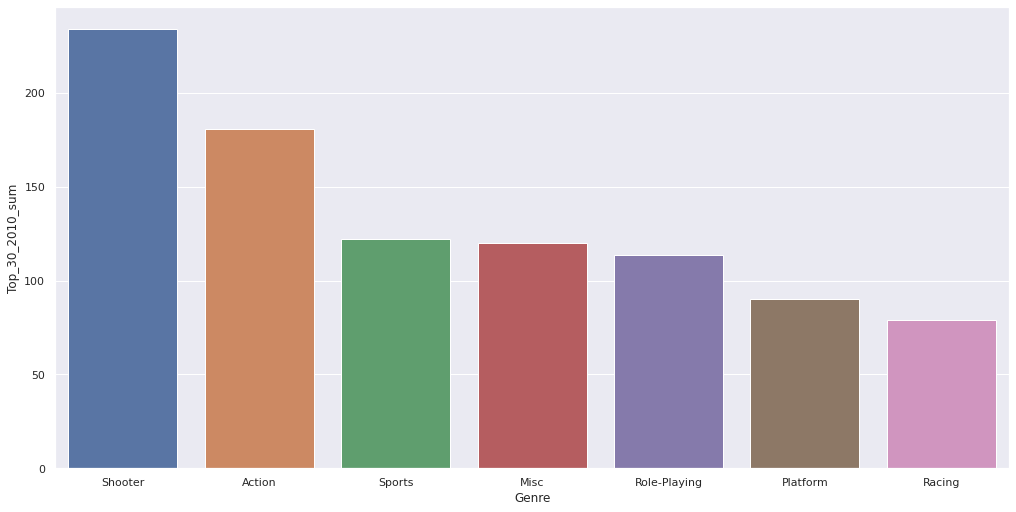

In [ ]:
#3-- 시각화
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1)
ax = sns.barplot(x = 'Genre', y = 'Top_30_2010_sum', data = Top_30_2010_Sales)
sns.set_theme(font_scale = 3)
#sns.set(font_scale= 8)
#plt.tick_params(axis = 'x', labelsize = 0.2)
plt.tight_layout()

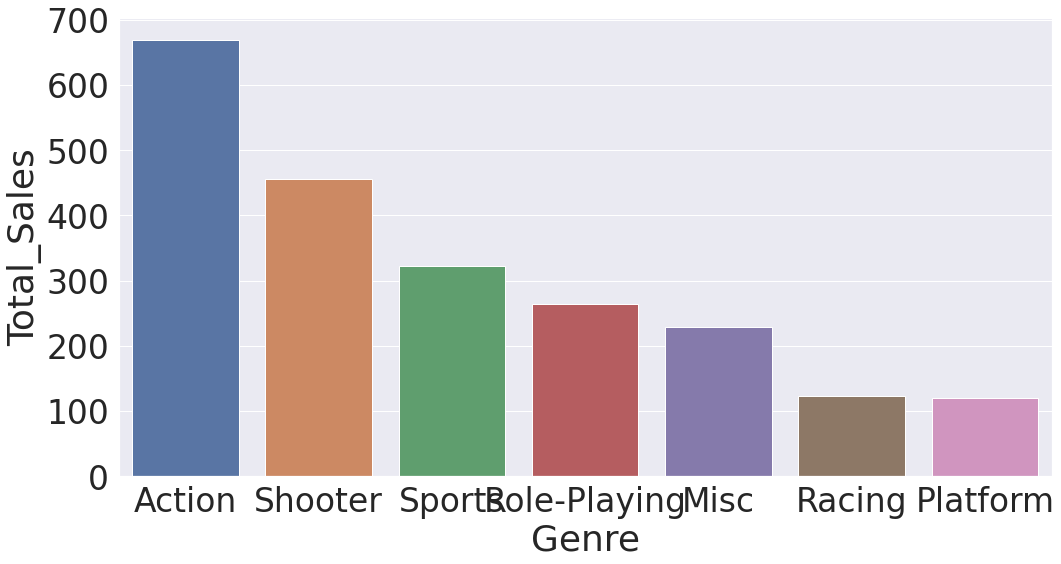

In [ ]:
# 2010년 이후 출시 게임의 장르별 출고량
df2010 = df.loc[df['Year'] > 2009]
pop2010 = df2010[['Genre', 'Total_Sales']].groupby(df['Genre']).sum().sort_values('Total_Sales',ascending = False).head(7).reset_index()

fig = plt.figure(figsize = (15,8))
ax2 = fig.add_subplot(1,1,1)
ax2 = sns.barplot(x = 'Genre', y = 'Total_Sales', data = pop2010)
sns.set_theme(font_scale = 1)
plt.tight_layout()

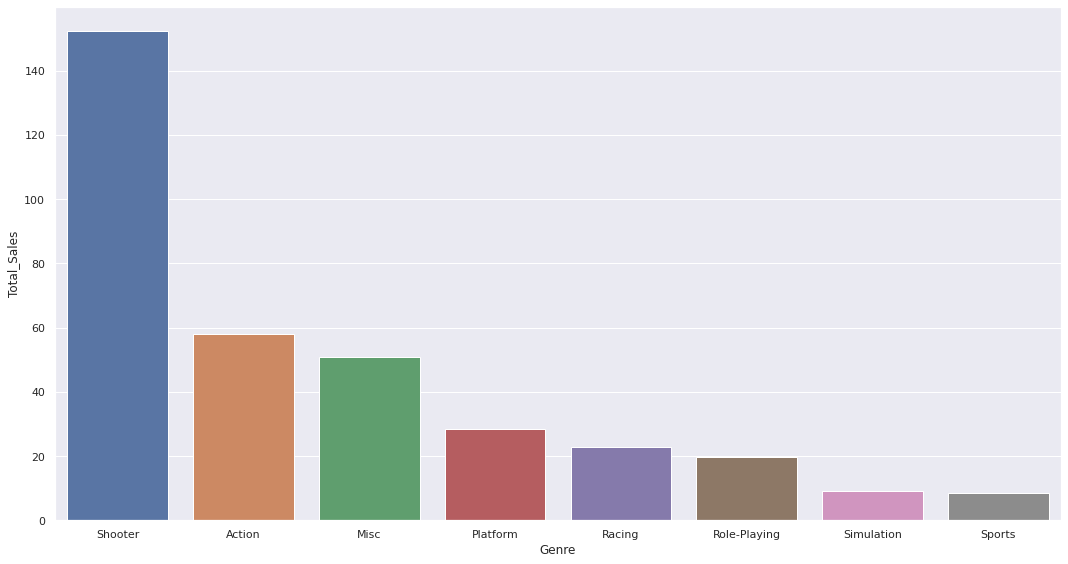

In [ ]:
#2010년 이후 출시 게임의 Top30의 장르별 출고량
df2010_top30 = df2010[['Name','Genre', 'Total_Sales']].sort_values('Total_Sales',ascending = False).head(30).reset_index()
df2010_top30_group = df2010_top30.loc[:,['Genre', 'Total_Sales']].groupby('Genre').sum().sort_values('Total_Sales',ascending = False).reset_index()

fig = plt.figure(figsize = (15,8))
ax2 = fig.add_subplot(1,1,1)
ax2 = sns.barplot(x = 'Genre', y = 'Total_Sales', data = df2010_top30_group)
sns.set_theme(font_scale = 1.0)
plt.tight_layout()

In [ ]:
#4 출고량 / 게임 수(장르별)
#장르별 게임 수
import numpy as np
df_4_1 = df.loc[:,['Genre']].groupby(df['Genre']).size()
df_4_1 = pd.DataFrame(df_4_1)
#장르별 출고량 수 
df_4_2 = df.loc[:,['Genre','Total_Sales']].groupby(df['Genre']).sum()

df_4_1 = np.array(df_4_1)
#df_4_1 = np.reshape(df_4_1,(12,1))
df_4_2 = np.array(df_4_2)
#df_4_2 = np.reshape(df_4_2,(12,1))

#장르별 출고량 수 / 장르별 게임 수 -> 값이 클수록 경쟁률 낮음
df_4_3 = df_4_2 / df_4_1



In [ ]:
row_indices = ['Action','Adventure','Fighting', 'Misc', 'Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
column_names = ["competition"]
Competition = pd.DataFrame(df_4_3, index=row_indices, columns=column_names)
Competition

,competition
Action,0.529402
Adventure,0.184399
Fighting,0.533559
Misc,0.465721
Platform,0.950555
Puzzle,0.430054
Racing,0.595054
Role-Playing,0.600103
Shooter,0.801506
Simulation,0.461855


In [ ]:
#5. 게임 장르와 플랫폼의 관계
#5-1
# 분포로 확인 -> chi square test
from scipy.stats import chi2_contingency


obs = pd.crosstab( df['Genre'],df['Platform'])
chi2_contingency(obs)

#귀무가설 : 게임 장르와 플랫폼의 관계는 독립이다.(관계없다) 
#대립가설 : 게임 장르와 플랫폼의 관계는 종속이다.(관련이 있다)
#p.value = 0.00 이므로 귀무가설 기각 -> 대립가설 채택 
#결론 : 게임 장르와 플랫폼의 관계는 종속이다.

(5772.691201706838,
 0.0,
 330,
 array([[2.29843256e+01, 5.99591103e-01, 9.87326684e+01, 1.03929125e+01,
         4.21912273e+02, 1.91869153e+01, 1.55893687e+02, 1.07526671e+02,
         5.39631993e+00, 1.99863701e-01, 6.21576111e+01, 1.93867790e+01,
         2.39836441e+00, 1.85673378e+02, 1.99863701e-01, 2.35439440e+02,
         4.21512546e+02, 2.58024038e+02, 6.63547488e+01, 2.37038350e+02,
         8.07449353e+01, 3.39768292e+01, 1.19918221e+00, 4.71678335e+01,
         3.99727402e-01, 1.19918221e+00, 2.55625674e+02, 2.85805093e+01,
         2.45032898e+02, 1.58691779e+02, 4.23711046e+01],
        [9.00563782e+00, 2.34929682e-01, 3.86850877e+01, 4.07211449e+00,
         1.65312186e+02, 7.51774983e+00, 6.10817174e+01, 4.21307230e+01,
         2.11436714e+00, 7.83098941e-02, 2.43543771e+01, 7.59605972e+00,
         9.39718729e-01, 7.27498916e+01, 7.83098941e-02, 9.22490552e+01,
         1.65155567e+02, 1.01098073e+02, 2.59988848e+01, 9.28755344e+01,
         3.16371972e+01, 1.3312682

In [ ]:
#5-2 장르와 플랫폼의 관계가 종속이라면 플랫폼 별 게임 수를 찾아보자
df_P_G = df[['Genre','Platform']].groupby(['Genre','Platform']).size().reset_index()

def Genre_Platform(genre):
  return df_P_G.loc[df_P_G['Genre']==genre].sort_values(0,ascending=False).head(3)

#GENRE = ['Platform', 'Shooter', 'Sports', 'Role-Playing', 'Action', 'Racing', 'Misc']R
a1 = Genre_Platform('Platform')
a2 = Genre_Platform('Shooter')
a3 = Genre_Platform('Sports')
a4 = Genre_Platform('Role-Playing')
a5 = Genre_Platform('Action')
a6 = Genre_Platform('Racing')
a7 = Genre_Platform('Misc')

#fig = plt.figure()
#axes1 = fig.add_subplots(2,4,1)
a2

,Genre,Platform,0
219,Shooter,X360,195
209,Shooter,PS2,157
210,Shooter,PS3,154


In [ ]:
df_P_G.loc[df_P_G['Genre']=='Shooter'].sort_values(0,ascending=False).head(10)

,Genre,Platform,0
219,Shooter,X360,195
209,Shooter,PS2,157
210,Shooter,PS3,154
207,Shooter,PC,144
220,Shooter,XB,123
208,Shooter,PS,95
217,Shooter,Wii,59
203,Shooter,GC,48
200,Shooter,DS,41
202,Shooter,GBA,40


In [ ]:
df_P_G.loc[df_P_G['Genre']=='Action'].sort_values(0,ascending=False).head(10)

,Genre,Platform,0
13,Action,PS3,368
12,Action,PS2,341
3,Action,DS,333
21,Action,X360,318
19,Action,Wii,228
15,Action,PSP,216
1,Action,3DS,179
5,Action,GBA,161
10,Action,PC,160
22,Action,XB,152


In [ ]:
df_P_G.loc[df_P_G['Genre']=='Misc'].sort_values(0,ascending=False).head(10)

,Genre,Platform,0
76,Misc,DS,387
93,Misc,Wii,268
85,Misc,PS2,216
95,Misc,X360,122
86,Misc,PS3,118
88,Misc,PSP,104
78,Misc,GBA,86
84,Misc,PS,76
75,Misc,3DS,51
96,Misc,XB,45


In [ ]:
# 2010년 이후 출시 게임의 장르별 평균 출고량
df_G_mean = df.loc[df['Year'] > 2009].groupby('Genre').mean().sort_values('Total_Sales',ascending=False).reset_index()
df_G_mean[['Genre','Total_Sales']]

,Genre,Total_Sales
0,Shooter,1.170256
1,Platform,0.804867
2,Sports,0.567425
3,Racing,0.534589
4,Role-Playing,0.481275
5,Action,0.468502
6,Fighting,0.418196
7,Misc,0.410413
8,Simulation,0.345561
9,Strategy,0.213916
